**PREDICTING MILES PER GALON OF CARS USING MULTI LINEAR REGRESSION MODEL**

In [4]:
## import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

from google.colab import files


**PROBLEM STATEMENT**
for average income earners , choosing a car of choice comes with choosing the one that consumes fuel less, this model will be aiming to predict the miles per gallon of different car models using their weight,acceleration,  and cylinder capacity


The data set was gotten from geeksforgeeks.org

In [5]:
df = pd.read_csv("/content/drive/MyDrive/auto-mpg[1].csv")

**DATA DESCRIPTION**

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**SUMMARY STATISTICS**

In [9]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
df[["mpg","cylinders","displacement","weight","acceleration",]].corr()

,mpg,cylinders,displacement,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000


In [11]:
df[["mpg","cylinders","acceleration","weight"]].corr()

,mpg,cylinders,acceleration,weight
mpg,1.000000,-0.775396,0.420289,-0.831741
cylinders,-0.775396,1.000000,-0.505419,0.896017
acceleration,0.420289,-0.505419,1.000000,-0.417457
weight,-0.831741,0.896017,-0.417457,1.000000


**EDA= EXPLORATORY DATA ANALYSIS**

In [12]:
df["mpg"].describe()

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


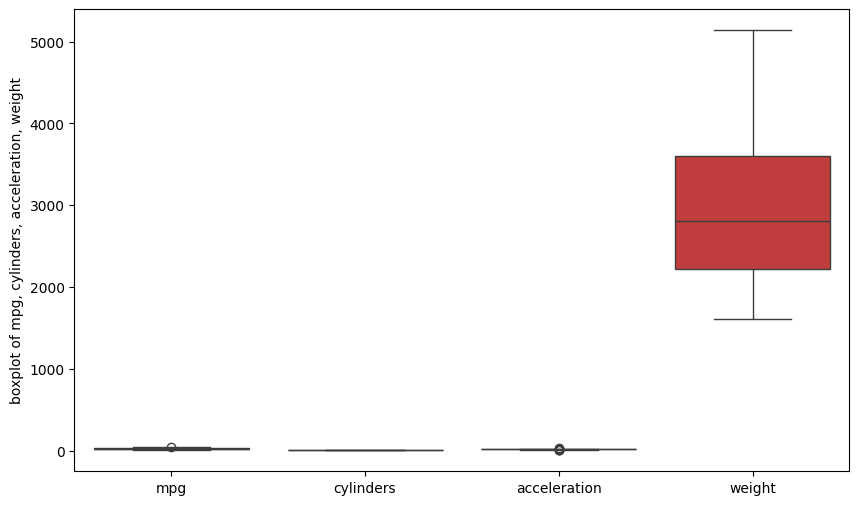

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[["mpg","cylinders","acceleration","weight"]])
plt.ylabel("boxplot of mpg, cylinders, acceleration, weight")
plt.show()

**HANDLING OUTLIER VALUES* **bold text**



In [14]:
for column in df[["mpg", "cylinders", "acceleration", "weight"]]:
   # STEP 1: calculate 25th and 75th percentiles
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  # print(Q1, Q3)

  # STEP 2: calculate InterQuartile Range
  IQR = Q3 - Q1

  # STEP 3: calculate upper and lower bounds
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  # STEP 4: Floor outliers (replace outlier values with upper_bound and low_bound values)
  # flooring outliers above upper bound
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  # flooring outliers below lower bound
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])


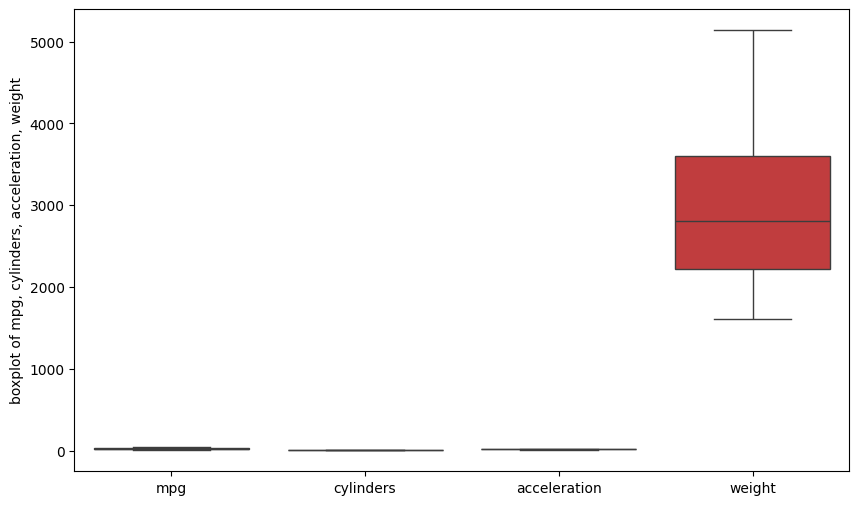

In [15]:
 #check if outliers have been removed

plt.figure(figsize=(10,6))
sns.boxplot(data=df[["mpg","cylinders","acceleration","weight"]])
plt.ylabel("boxplot of mpg, cylinders, acceleration, weight")
plt.show()


**DECIDE ON THE MOST APPROPRIATE MACHINE LEARNING MODEL**

> A MULTILINEAR REGRESSION MODEL WILL BE USED SINCE WE ARE USING MULTIPLE COLUMNS AS THE FEATURE MATRIX



**TRAIN AND TEST MODEL**

*   before a model is created, the dataset has to be trimmed into relevant columns
*   then the trimmed data is divided into feature matrix and target vector


*   the data ia then vertically divided into train and test data






In [16]:
model_df = df[["mpg", "cylinders", "acceleration", "weight"]]
model_df

,mpg,cylinders,acceleration,weight
0,18.0,8.0,12.0,3504.0
1,15.0,8.0,11.5,3693.0
2,18.0,8.0,11.0,3436.0
3,16.0,8.0,12.0,3433.0
4,17.0,8.0,10.5,3449.0
...,...,...,...,...
393,27.0,4.0,15.6,2790.0
394,44.0,4.0,22.2,2130.0
395,32.0,4.0,11.6,2295.0
396,28.0,4.0,18.6,2625.0


In [17]:
# divide data into feature and target
feature = ["acceleration", "weight", "cylinders"]
target = "mpg"

X = model_df[feature]
Y = model_df[target]

In [18]:
# divide model into train and test model using train_test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**CREATE MODEL AND EVALUATE ITS PERFORMANCE**


In [19]:
# BASELINING
#LETS CREATE A BASELINE MODEL

baseline_model = Y_train.mean()

baseline_model

23.60707547169811

In [20]:
# baseline_pred =

baseline_pred = [baseline_model] * len(Y_test)

baseline_pred

[23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,
 23.60707547169811,


**EVALUATE BASELINE PERFORMANCE**

*   MEAN ABSOLUTE ERROR METRIC WILL BE USED




In [21]:
baseline_mae = mean_absolute_error(Y_test, baseline_pred)

print("The mean value of Y_train values is:", round(baseline_model, 2))
print("The baseline MAE is:", round(baseline_mae, 2))

The mean value of Y_train values is: 23.61
The baseline MAE is: 5.96


**CREATE A MULTI LINEAR REGRESSION MODEL**




In [22]:
# let's create a linear regression model

model = LinearRegression()
model

LinearRegression()

In [23]:
# to fit a model means to train it using the X_train and y_train values

model.fit(X_train, Y_train)

LinearRegression()

**TEST MODEL WITH TRAINING DATA**

In [24]:
# we'd generate predictions using X_train

model_train_pred = model.predict(X_train)

model_train_pred

array([18.50251582, 29.69310451, 31.11554597, 32.25861661, 26.04219022,
       12.17471578, 31.61640014, 29.24545678, 29.58389986,  8.3080441 ,
       12.61269008, 27.88393532, 29.70280959, 32.52324246, 23.55134103,
       29.76550212, 27.36132451, 21.43800198, 25.22013414, 14.6135789 ,
       31.86698292, 28.42967286, 24.58824944, 16.81601054, 20.13306645,
       12.03332183, 32.82882599, 10.57714739, 29.23554853, 31.68286863,
       32.92008756, 27.66887386, 17.94670837, 31.02481477, 26.20171459,
       28.82436479, 29.9862994 , 20.90859459, 29.73226788, 20.41959867,
       12.2007728 , 28.87089273, 25.92911858, 22.58450555, 25.32784396,
       23.18287763, 30.95062285, 24.79097569, 30.27462593, 27.0805499 ,
       31.61190646, 31.41843012, 30.74638067, 21.9773018 , 26.59082044,
       20.54390715, 22.25359855, 32.46574551, 30.70774768, 29.14177492,
       21.07871328, 11.27633044, 14.82520148, 22.8191269 , 22.93229485,
       31.83234488, 30.376685  , 30.0472194 , 28.75895706, 27.42

**EVALUATE MODEL PERFORMANCE**

In [25]:
# Calculate model MAE for training data

model_train_mae = mean_absolute_error(Y_train, model_train_pred)

round(model_train_mae, 3)

3.347

**COMPARING BASELINE MAE AND MODEL TRAIN MAE**

In [26]:
# print baseline and model (train) mae to compare both

print("The baseline |MAE is:\t\t", round(baseline_mae, 4))
print("The model (train) MAE is:\t", round(model_train_mae, 4))

The baseline |MAE is:		 5.9554
The model (train) MAE is:	 3.3466


**TEST MODEL WITH TEST DATA**

In [27]:
# model generates predictions off X_test values

model_test_pred = model.predict(X_test)

model_test_pred

array([32.48766771, 27.20576344, 25.02926614, 15.36754371, 13.64799152,
       30.28414367, 25.17972267,  9.65250186, 15.70565958, 24.21064298,
       15.10416596, 30.88774298, 32.03120414, 15.54952065, 27.44414493,
        8.28810356, 27.06814544, 21.78345077, 13.09521067, 31.36363254,
       27.84601409, 24.19608536, 24.02613818, 30.33282478, 18.03058955,
       31.20089424, 28.99159677, 25.93225203, 20.28252688,  8.809616  ,
       25.52158285, 30.8467853 , 16.45584842, 28.90518774, 30.80295673,
       12.39638648, 26.30187249, 18.79067083, 11.91316399, 29.49316866,
       24.57099244, 32.54174756, 24.35568494, 11.03757426, 27.19388937,
       29.49369904, 28.82416162, 25.90134247, 28.6520771 , 29.46658127,
       28.72645637, 30.86043786, 29.11915082, 12.0266908 , 24.34607617,
       11.55170631, 15.32838034, 26.02710222, 28.99824362, 21.42920196,
       16.7712769 , 32.50724939, 26.7994006 , 25.02901414, 23.82206752,
       28.9438049 , 25.48117138, 30.5909753 , 30.9553197 , 14.47

**EVALUATE MODEL PERFORMANCE 2**

In [28]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(Y_test, model_test_pred)

round(model_test_mae, 3)

3.086

**Compare Baseline MAE, Model testing MAE and Model training MAE**

In [29]:
# print baseline model (train) and model (test) MAEs to compare the three of them

print("The baseline MAE is:\t\t", round(baseline_mae, 3))
print("The model (train) MAE is:\t", round(model_train_mae, 3))
print("The model (test) MAE is:\t", round(model_test_mae, 3))

The baseline MAE is:		 5.955
The model (train) MAE is:	 3.347
The model (test) MAE is:	 3.086


**saving model using pickle**

In [30]:
with open("model.pkl", "wb") as f:
  pickle.dump(model,  f)

In [31]:
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**save file containing streamlit code to local drive**

In [32]:
# streamlit code

%%writefile app.py

import pickle
import streamlit as st
import pandas as pd

# load the file that contains the model (model.pkl)
with open("model.pkl", "rb") as f:
  model = pickle.load(f)

# give the Streamlit app page a title
st.title("miles per galon predictor")

# input widget for getting user values for X (feature matrix value)
price = st.slider("acceleration", min_value=0, max_value=100, value=20)
horsepower = st.slider("weight", min_value=0, max_value=100, value=20)
eng_size = st.slider("cylinders", min_value=0, max_value=100, value=20)

# After selesting price, the user then submits the price value
if st.button("Predict"):
  # take the price value, and format the value the right way
  prediction = model.predict([[price, horsepower, eng_size]])[0].round(2)
  st.write("The predicted miles per galon of your car is", prediction, "mpg")

Writing app.py


In [33]:
files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# creating the requirements.txt file

%%writefile requirements.txt
pickle4
streamlit
pandas
scikit-learn


Writing requirements.txt


In [35]:
# download the requirements.txt

files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>